In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
import sys
sys.path.append("..")
from utils import load_json_files, extract_id_files, match_files, load_json

#### Load Survey Data

In [68]:
data_dir = Path("../../data/Bergen-Belsen-Full-Data/LogsBergenBelsen")
pattern = 'Log_Survey*.json'  # Survey files pattern

In [83]:
survey = load_json_files(data_dir, pattern)
visitor_ids = extract_id_files(data_dir, pattern)
survey_tables = [pd.json_normalize(s, sep='_') for s in survey]
df_survey = pd.DataFrame({f"df_{i}": df["answer"] for i, df in enumerate(survey_tables)})
df_survey.columns = visitor_ids
df_survey.index = survey_tables[100]['question'] # English questions

In [82]:
df_survey


,1740485052155,1733546203534,1741184451124,1738344276822,1733742617208,1741685293294,1742348704355,1742041458749,1742382663419,1733328734665,...,1744450434731,1744031230752,1738503696007,1742805972204,1738750176593,1738759363840,1743419136140,1747056304730,1742038595304,1741525453022
question,,,,,,,,,,,,,,,,,,,,,
1.What is your nationality?,deutsch,,germany,,,,,,,,...,,,deutsch,,,,,,,
2.How do you identify? I identify as a...,Weiblich,,Männlich,,,,,,Female,,...,,,Männlich,,,,,,,
3.How old are you?,35-44,,16-18,,,,,,35-44,,...,,,65-74,,,,,,,
4.What is your highest level of education?,Berufsausbildung oder Lehre,,,,,,,,,,...,,,Berufsausbildung oder Lehre,,,,,,,
5.How are you visiting?,Als Erwachsener mit anderen Erwachsenen,,,,,,,,,,...,,,Allein,,,,,,,
6.What is the purpose of your visit?,Um mehr über die Geschichte zu erfahren,,Für die Forschung,,,,,,,,...,,,Um mehr über die Geschichte zu erfahren_Zum Ge...,,,,,,,
7.Are you religious? (optional),NEIN,,NEIN,,,,,,,,...,,,Ja,,,,,,,
8.How do you identify politically? (optional),2.Links von der Mitte,3.Mitte,5.Ganz rechts,3.Mitte,3.Centre,3.Mitte,3.Centre,3.Mitte,3.Centre,3.Centre,...,3.Mitte,3.Mitte,3.Mitte,3.Mitte,3.Mitte,3.Mitte,3.Mitte,N/A,3.Centre,3.Mitte
9.Have you visited a memorial site of Nazi persecution before?,"Ja, mehr als einmal zuvor",,NEIN,,,,,,,,...,,,"Ja, mehr als einmal zuvor",,,,,,,


In [5]:
df_survey.T.to_csv("../logs/survey_data.csv")

### Translation

#### Relate survey profiles with data

In [84]:
import seaborn as sns

In [85]:
df_survey = df_survey.T

##### Translate surveys

`column_mapping`

In [136]:
column_rename_mapping = {
    '1.What is your nationality?': 'nationality',
    '2.How do you identify? I identify as a...': 'gender_identity',
    '3.How old are you?': 'age',
    '4.What is your highest level of education?': 'education_level',
    '5.How are you visiting?': 'visit_type',
    '6.What is the purpose of your visit?': 'visit_purpose',
    '7.Are you religious? (optional)': 'religious',
    '8.How do you identify politically? (optional)': 'political_identity',
    '9.Have you visited a memorial site of Nazi persecution before?': 'visited_memorial_before',
    '10.Do you have a personal connection to history related to Nazi persecution and/or Bergen-Belsen? ': 'personal_connection_nazi_history',
    '10A.If yes, please specify:': 'personal_connection_details',
    '11.How much do you know about World War II?': 'knowledge_ww2',
    '12.How much do you know about the history of the Bergen-Belsen concentration camp?': 'knowledge_bergen_belsen',
    '13.How much do you know about what happened to the persecuted Jews in the Nazi camps?': 'knowledge_persecuted_jews',
    '14.How much do you know about other groups persecuted by the Nazis based on their e.g. ethnicity, sexuality, political views?': 'knowledge_other_persecuted_groups',
    '15.Please indicate groups of people persecuted by the Nazis that you know about: (open question)': 'known_persecuted_groups_open',
    '16.Which of the following technologies have you used before? (check all that apply)': 'technologies_used',
    '17.How often do you play video games (console, mobile or PC)? I play video games': 'videogame_frequency',
    '18.I often felt as if I was part of the activity': 'felt_part_of_activity',
    '19.I was more involved with the activity than with any other irrelevant thoughts': 'involvement_over_irrelevant_thoughts',
    '20.The activity felt more as something that I was experiencing, rather than just doing': 'experienced_activity_feeling',
    '21.I lost track of time, and the only thing that I could think of was about the activity': 'lost_track_of_time',
    '22.Was interesting to me': 'was_interesting',
    '23.Left a weak impression on me': 'left_weak_impression',
    '24.Was boring to me': 'was_boring',
    '25.Was something I thought was innovative': 'thought_innovative',
    '26.Made me understand what the Bergen-Belsen concentration camp looked like': 'understood_camp_appearance',
    '27.Gave me an impression of what life was like for those who were imprisoned': 'understood_life_in_camp',
    '28.Gave me an impression of how the camp worked': 'understood_camp_function',
    '29.Made me feel sympathetic towards the victims of Nazi persecution': 'felt_sympathetic_to_victims',
    '30.Impacted my view on my own life': 'impact_on_own_life',
    '31.Impacted my view on today�s society': 'impact_on_society',
    '32.How did it impact your view on today�s society?: (optional)': 'impact_society_details',
    '33.I feel like I want to share what I learnt with my family / friends / colleagues': 'want_to_share_learning',
    '34.Because of the exploration, I plan to learn more about the history of Nazi persecution': 'plan_to_learn_more',
    '35.Is there anything else you would like to share with us about the presentation and what you thought of it?: (optional)': 'additional_feedback',
    'Email address:': 'email'
}

In [137]:
# df_survey.rename(columns=column_rename_mapping, inplace=True)
df_survey.columns = df_survey.columns.map(column_rename_mapping)

`mapping`

In [138]:
country_mapping = {
    '': None,
    'Germany': 'Germany',
    'german': 'Germany',
    'germany': 'Germany',
    ' german': 'Germany',
    'deutschland': 'Germany',
    'Deutsch': 'Germany',
    'deutsch': 'Germany',
    'de': 'Germany',
    'detsch': 'Germany',
    'deutsche': 'Germany',
    'deusch': 'Germany',
    'DEUTSCH': 'Germany',
    'DEU': 'Germany',
    'DEUTSCH ': 'Germany',
    'Dd': 'Germany',
    'Deuts': 'Germany',

    'polen': 'Poland',
    'Polen': 'Poland',
    'polish': 'Poland',

    'irish': 'Ireland',
    'Scottish': 'United Kingdom',
    'british': 'United Kingdom',
    'english': 'United Kingdom',

    'france': 'France',
    'iran': 'Iran',
    'Hebreisch': 'Israel',
    'israeli': 'Israel',
    'türkisch': 'Turkey',
    'turkish': 'Turkey',
    'türken': 'Turkey',

    'mexican': 'Mexico',
    'netherlands': 'Netherlands',
    'nederlands': 'Netherlands',
    'czech': 'Czech Republic',
    'portugal': 'Portugal',
    'Romanian': 'Romania',
    'us': 'United States',
    'pakistani': 'Pakistan',
    'Nepal': 'Nepal',
    'Afghaner': 'Afghanistan',
    'afrikanisch': 'Africa',  # Could be more specific
    'brasilianisch': 'Brazil',
    'ukraine': 'Ukraine',

    'Flackenhorster': 'Spam',  # Possibly a place, unclear
    'morgen ': 'Spam',  # Likely noise
    'penis': 'Spam',    # Clear spam/noise

    'Admjn': 'Testing',
    'admin': 'Testing',
}

In [139]:
df_survey['nationality'] = df_survey['nationality'].map(country_mapping)
df_survey = df_survey[df_survey['nationality'] != 'Testing']

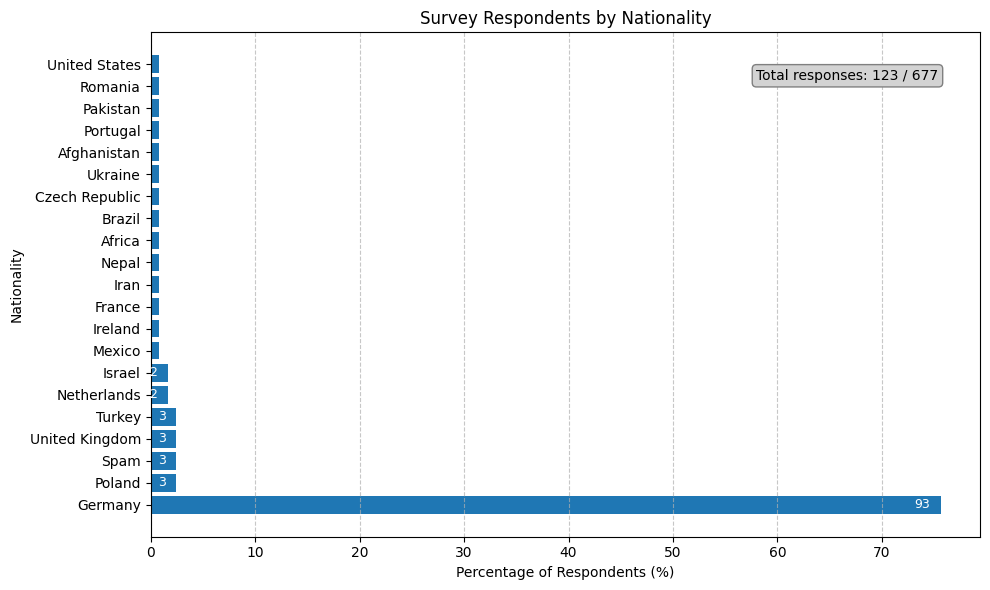

In [30]:
# Plotting
counts = df_survey['nationality'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)

plt.title('Survey Respondents by Nationality (Normalized)')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Nationality')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Survey Respondents by Nationality')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Nationality')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [140]:
df_survey

question,nationality,gender_identity,age,education_level,visit_type,visit_purpose,religious,political_identity,visited_memorial_before,personal_connection_nazi_history,...,understood_life_in_camp,understood_camp_function,felt_sympathetic_to_victims,impact_on_own_life,impact_on_society,impact_society_details,want_to_share_learning,plan_to_learn_more,additional_feedback,email
1732835511436,None,,,,,,,3.Centre,,,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,,3.Undecided,3.Undecided,,
1732836715570,None,,,,,,,3.Centre,,,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,,3.Undecided,3.Undecided,,
1732837590169,None,,,,,,,3.Centre,,,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,,3.Undecided,3.Undecided,,
1732838671324,None,,,,,,,3.Centre,,,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,,3.Undecided,3.Undecided,,
1732838916442,None,,,,,,,3.Centre,,,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,,3.Undecided,3.Undecided,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744791846248,None,,,,,,,3.Mitte,,,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,,3.Unentschieden,3.Unentschieden,,
1744792143311,Germany,Männlich,Jünger als 16,Weiterführende Schule,Andere_,Zum Gedenken_Andere,NEIN,3.Mitte,NEIN,NEIN,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,,3.Unentschieden,3.Unentschieden,,
1744793647474,None,,,,,,,3.Mitte,,,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,,3.Unentschieden,3.Unentschieden,,
1744793886140,None,,,,,,,3.Mitte,,,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,,3.Unentschieden,3.Unentschieden,,


In [141]:
# Translate column headers from German to English
translated_columns = {
    "Unnamed: 0": "Response_ID",
    "1.What is your nationality?": "Nationality",
    "2.How do you identify? I identify as a...": "Gender Identity",
    "3.How old are you?": "Age",
    "4.What is your highest level of education?": "Highest Education Level",
    "5.How are you visiting?": "Visit Type",
    "6.What is the purpose of your visit?": "Visit Purpose",
    "7.Are you religious? (optional)": "Religious (optional)",
    "8.How do you identify politically? (optional)": "Political Identity (optional)",
    "9.Have you visited a memorial site of Nazi persecution before?": "Previous Memorial Visit",
    '10.Do you have a personal connection to history related to Nazi persecution and/or Bergen-Belsen? ': 'Personal Connection',
    "27.Gave me an impression of what life was like for those who were imprisoned": "Impression of Prisoners' Life",
    "28.Gave me an impression of how the camp worked": "Impression of Camp Operation",
    "29.Made me feel sympathetic towards the victims of Nazi persecution": "Sympathy Towards Victims",
    "30.Impacted my view on my own life": "Impact on Personal Life",
    "31.Impacted my view on today�s society": "Impact on Society View",
    "32.How did it impact your view on today�s society?: (optional)": "Explanation of Society View Impact (optional)",
    "33.I feel like I want to share what I learnt with my family / friends / colleagues": "Desire to Share Learning",
    "34.Because of the exploration, I plan to learn more about the history of Nazi persecution": "Plan to Learn More",
    "35.Is there anything else you would like to share with us about the presentation and what you thought of it?: (optional)": "Additional Feedback (optional)",
    "Email address:": "Email Address"
}

# Define translation mapping for specific German responses to English

response_translation_mapping = {
    # Gender Identity
    'Weiblich': 'Female',
    'Männlich': 'Male',

    # Education Levels
    'Weiterführende Schule': 'Secondary school',

    # Visit Types
    'Als Schüler*in/Student*in mit meiner Gruppe': 'As a student with my group',

    # Visit Purposes
    'Um mehr über die Geschichte zu erfahren': 'To learn more about the history',

    # Religious
    'Ja': 'Yes',
    'Nein': 'No',

    # Previous Memorial Visit
    'Ja, schon einmal': 'Yes, once before',
    'Nein, noch nie': 'No, never',

    # Scale Responses
    '3.Unentschieden': '3.Undecided',
    '2.Stimme eher nicht zu': '2.Rather disagree',
    '4.Stimme eher zu': '4.Rather agree',
    '1.Stimme überhaupt nicht zu': '1.Strongly disagree',
    '5.Stimme vollkommen zu': '5.Strongly agree',

    # Political Identity
    '3.Mitte': '3.Centre'
}

additional_translation_mapping = {
    # Nationality corrections
    'polen': 'Poland',
    'Admjn': 'Admin',
    'Flackenhorster': 'Flackenhorst',
    'deutschland': 'German',
    'Deutsch': 'German',
    'deutsch': 'German',
    'Germany': 'German',
    'Germane': 'German',
    'german': 'German',
    'germany': 'German',
    'morgen ': 'Inappropritate',
    'türkisch': 'Turkish',
    'penis': 'Inappropriate',
    'Flackenhorst': 'German',

    # Gender Identity
    'Andere_Mettwurst': 'Other',

    # Education Levels
    'Promotion': 'Doctorate',
    'Bachelor-Abschluss': "Bachelor's degree",
    'High school (gymnasium)': 'High school',
    'Berufsausbildung oder Lehre': 'Vocational training or apprenticeship',
    'Master-Abschluss': "Master's degree",
    'Gymnasium': 'High school',

    # Visit Types
    'Als Erwachsener mit anderen Erwachsenen': 'As an adult with other adults',
    'Allein': 'Alone',

    # Visit Purposes
    'Andere': 'Other',
    'Um mehr über die Geschichte zu erfahren_Zum Gedenken': 'To learn more about the history_For commemoration',
    'Zum Gedenken': 'For commemoration',

    # Religious
    'Ich weiß nicht': "I don't know",
    'NEIN': 'No',

    # Political Identity
    '3.Mitte ': '3.Centre',
    '1.Ganz links': '1.Far left',
    '2.Links von der Mitte': '2.Left of centre',
    '5.Ganz rechts': '5.Far right',
    '4.Rechts von der Mitte': '4.Right of centre',

    # Previous Memorial Visit
    'Ja, mehr als einmal zuvor': 'Yes, more than once',

    # Personal Connection
    'Andere_Vorfahren wurden vetrieben': 'Other_Ancestors were displaced',
    'Ich bin ein Überlebender der Nazi-Verfolgung': 'I am a survivor of Nazi persecution',
    'Ich habe Verwandte, Vorfahren, Freunde oder Bekannte, die:_zu den Tätern gehörten':
    'I have relatives, ancestors, friends or acquaintances who:_were among the perpetrators',

    # Knowledge Scale Responses
    '3.Etwas': '3.Somewhat',
    '2.Sehr wenig': '2.Very little',
    '1.Überhaupt nicht': '1.Not at all',
    '5.Sehr viel': '5.Very much',
    '4.Mehr als der Durchschnitt': '4.More than average',

    # Persecuted groups (examples, not exhaustive)
    'Juden': 'Jews',
    'Sinti Roma Juden Politische Gegner': 'Sinti Roma Jews Political opponents',
    'Sinti und Roma, Juden, Homosexuele, Menschen mit Handycap':
    'Sinti and Roma, Jews, homosexuals, disabled people',
    'ss': 'SS',
    'Juden, Homosexuelle, Sinti&Roma, Behinderte':
    'Jews, homosexuals, Sinti & Roma, disabled people',
    'juden, andere politidche meinung, sinti und roma, homosexuelle, behinderte':
    'Jews, different political views, Sinti and Roma, homosexuals, disabled people',

    # Video game hours
    'Ich spiele ': 'I play ',
    ' Stunden pro Woche Videospiele.': ' hours per week video games.',

    # Scale responses
    '4.Zustimmen': '4.Agree',
    '2.Verschiedener Meinung sein': '2.Disagree',
    '5.Stimme völlig zu': '5.Strongly agree',

    # Additional Feedback
    'Admin Aliisa': 'Admin Aliisa',
    'hktler': 'Inappropriate',
}

# Translate the responses using the mapping
data_translated = df_survey.rename(columns=translated_columns)
data_translated.replace(response_translation_mapping, inplace=True)
data_fully_translated = data_translated.replace(additional_translation_mapping, regex=True)

In [32]:
# df_survey.loc["1738765493508",:]

In [142]:
surveys = data_fully_translated

In [ ]:
# data_fully_translated.drop(index=1733218842453, inplace=True)

`Email Data`

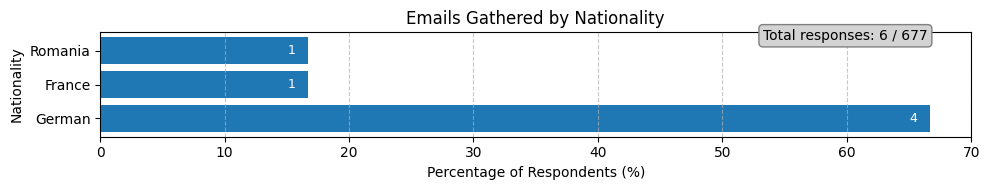

In [29]:
# Emails Found
email_data = surveys[surveys['email'] != '']

# Plotting
counts = email_data['nationality'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(10, 2))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)

plt.title('Email by Nationality')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Nationality')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Emails Gathered by Nationality')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Nationality')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [38]:
surveys.columns

Index(['nationality', 'gender_identity', 'age', 'education_level',
       'visit_type', 'visit_purpose', 'religious', 'political_identity',
       'visited_memorial_before', 'personal_connection_nazi_history',
       'personal_connection_details', 'knowledge_ww2',
       'knowledge_bergen_belsen', 'knowledge_persecuted_jews',
       'knowledge_other_persecuted_groups', 'known_persecuted_groups_open',
       'technologies_used', 'videogame_frequency', 'felt_part_of_activity',
       'involvement_over_irrelevant_thoughts', 'experienced_activity_feeling',
       'lost_track_of_time', 'was_interesting', 'left_weak_impression',
       'was_boring', 'thought_innovative', 'understood_camp_appearance',
       'understood_life_in_camp', 'understood_camp_function',
       'felt_sympathetic_to_victims', 'impact_on_own_life',
       'impact_on_society', 'impact_society_details', 'want_to_share_learning',
       'plan_to_learn_more', 'additional_feedback', 'email',
       'Assigned Profile'],
     

In [52]:
gender_mapping = {
    'Female': 'Female',
    'Male': 'Male',
    'Other': 'Other',
    'Prefer not to say': 'Prefer not to say',
    'Other_Hund': 'Spam',
    'Other_helikopter': 'Spam',
    'Other_affe': 'Spam',
    'Other_Pommespanzer': 'Spam',
    'Möchte dies nicht benennen': 'Prefer not to say',
    'Other_': 'Other'
}

In [55]:
surveys['gender_identity'].unique()

array(['', 'Female', 'Other', 'Male', 'Prefer not to say', 'Other_Hund',
       'Other_helikopter', 'Other_affe', 'Other_Pommespanzer',
       'Möchte dies nicht benennen', 'Other_'], dtype=object)

In [53]:
surveys['gender_cleaned'] = surveys['gender_identity'].map(gender_mapping)

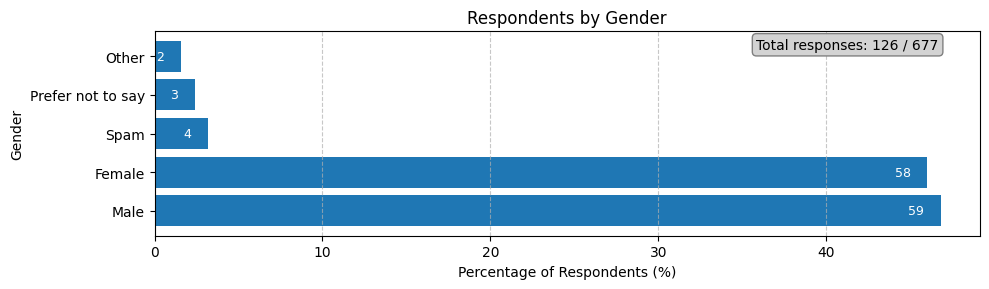

In [56]:
# Gender Data
gender_data = surveys[surveys['gender_cleaned'] != '']

# Plotting
counts = gender_data['gender_cleaned'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(10, 3))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)


# plt.xlabel('Percentage of Respondents (%)')
# plt.ylabel('Gender')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents by Gender')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Gender')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [66]:
education_mapping = {
    'Primary/Secondary school': 'Primary or Secondary school',
    'Secondary school': 'Secondary school',
    'High school (gymnasium)': 'High school',
    'High school': 'High school',
    'Vocational training or apprenticeship': 'Vocational training/apprenticeship',
    'Vocational training apprenticeship': 'Vocational training/apprenticeship',
    "Bachelor's degree": "Bachelor's degree",
    "Master's degree": "Master's degree",
    "Doctorate": "Doctorate",
}

In [67]:
surveys['education_level_cleaned'] = surveys['education_level'].map(education_mapping)

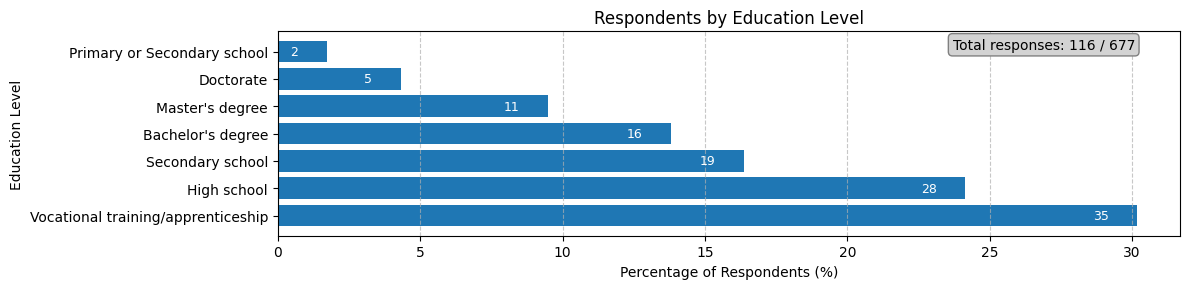

In [69]:
# Gender Data
education_data = surveys[surveys['education_level_cleaned'] != '']

# Plotting
counts = education_data['education_level_cleaned'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(12, 3))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)


# plt.xlabel('Percentage of Respondents (%)')
# plt.ylabel('Gender')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents by Education Level')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Education Level')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
visit_mapping = {
    'As a student with my group': 'As a student with my group',
    'As a student with my peers': 'As a student with my group',  # Normalize
    'Alone': 'Alone',
    'As an adult with other adults': 'As an adult with other adults',
    'As an adult with children': 'As an adult with children',
    'Als Erwachsener mit Kindern': 'As an adult with children',  # German translated

    # Realistic "Other" entries
    'Other_as a kid with my parents': 'Other',
    'Other_': 'Other',

    # Spam, jokes, nonsense
    'Other_Heli': 'Spam',
    'Other_Teanerin ver.di': 'Spam',
    'Other_mit meinem  panzer': 'Spam',
    'Other_akatan': 'Spam',
    'Other_Bundeswehr': 'Spam',
    'Other_mit mein vati': 'Spam',
    'Other_vater': 'Spam'
}

In [79]:
surveys['visit_type_cleaned'] = surveys['visit_type'].map(visit_mapping)

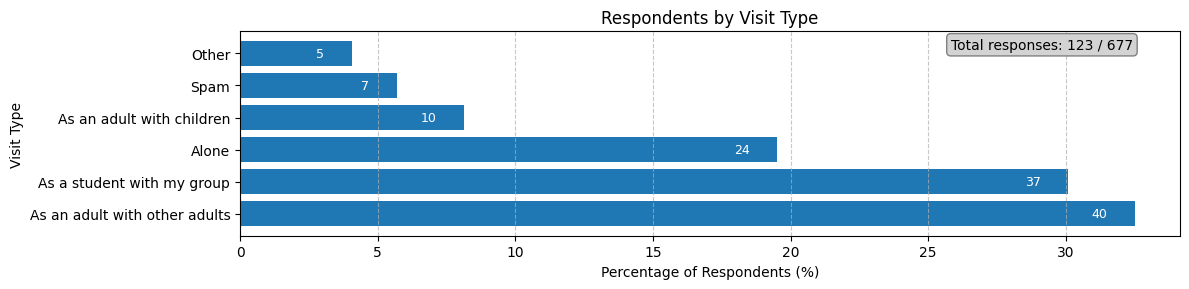

In [80]:
# Gender Data
visit_data = surveys[surveys['visit_type_cleaned'] != '']

# Plotting
counts = visit_data['visit_type_cleaned'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(12, 3))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)


# plt.xlabel('Percentage of Respondents (%)')
# plt.ylabel('Gender')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents by Visit Type')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Visit Type')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
def normalize_reason(text):
    if not text:
        return ['']

    mapping = {
        'To learn more about the history': 'Learn about history',
        'Um mehr über die Geschichte zu erfahren': 'Learn about history',
        'For commemoration': 'Commemoration',
        'For research': 'Research',
        'Für die Forschung': 'Research',
        'Other': 'Other',
    }

    reasons = set()
    parts = text.split('_')
    for part in parts:
        part = part.strip()
        normalized = mapping.get(part)
        if normalized:
            reasons.add(normalized)
    return list(reasons)


In [90]:
surveys['visit_purpose_cleaned'] = surveys['visit_purpose'].apply(normalize_reason)

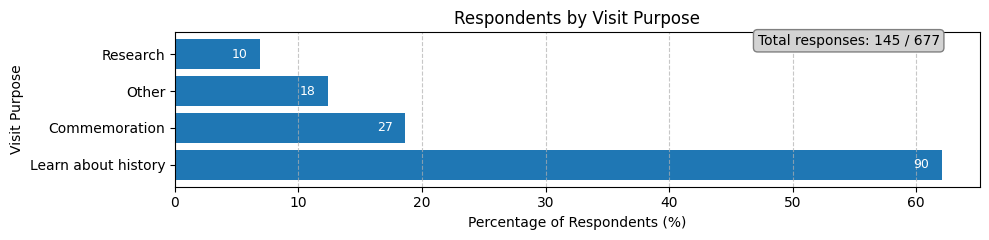

In [98]:
import matplotlib.pyplot as plt

# Explode the list so each reason has its own row
visit_data_exploded = surveys.explode('visit_purpose_cleaned')
visit_data_exploded = visit_data_exploded[visit_data_exploded['visit_purpose_cleaned'] != '']

# Plotting
counts = visit_data_exploded['visit_purpose_cleaned'].value_counts()
counts_normalized = counts / counts.sum() * 100

# Plot
plt.figure(figsize=(10, 2.5))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add counts inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add annotation
total_responses = counts.sum()
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents by Visit Purpose')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Visit Purpose')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


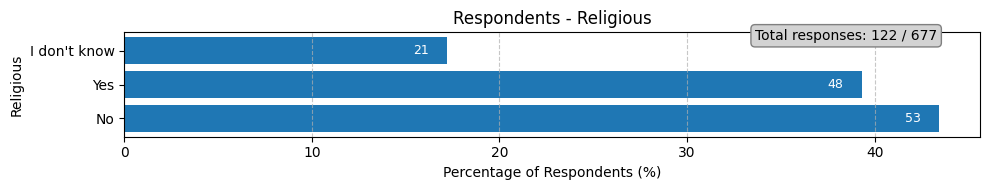

In [104]:
# Gender Data
religious_data = surveys[surveys['religious'] != '']

# Plotting
counts = religious_data['religious'].value_counts()
# Normalize counts to percentages
counts_normalized = counts / counts.sum() * 100

# Plotting
plt.figure(figsize=(10, 2))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{label}', va='center', ha='right', color='white', fontsize=9)


# plt.xlabel('Percentage of Respondents (%)')
# plt.ylabel('Gender')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate total number of non-NA responses
total_responses = counts.sum()

# Add annotation with total responses
plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents - Religious')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Religious')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [143]:
age_mapping = {
    'Jünger als 16': 'Younger than 16',
    'Younger than 16': 'Younger than 16',
    '16-18': '16–18',
    '18-24': '18–24',
    '25-34': '25–34',
    '35-44': '35–44',
    '45-54': '45–54',
    '55-64': '55–64',
    '65-74': '65–74',
    '85+': '85+',
}

In [144]:
surveys['age_cleaned'] = surveys['age'].map(age_mapping)

In [148]:
age_order = [
    'Younger than 16',
    '16–18',
    '18–24',
    '25–34',
    '35–44',
    '45–54',
    '55–64',
    '65–74',
    '85+'
]

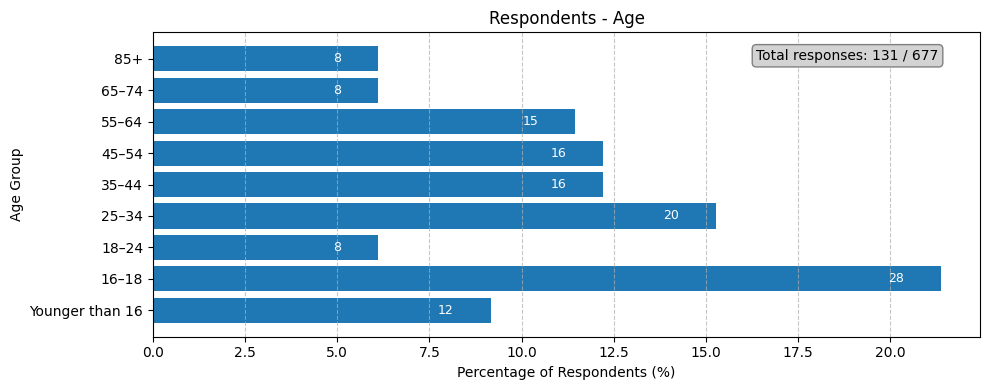

In [149]:
age_data = surveys[surveys['age_cleaned'] != '']

# Step 3: Count and reindex manually
counts = age_data['age_cleaned'].value_counts()
counts = counts.reindex(age_order).dropna()
counts_normalized = counts / counts.sum() * 100

# Step 4: Plot
plt.figure(figsize=(10, 4))
bars = plt.barh(counts_normalized.index, counts_normalized.values)

# Add the actual number inside the bars
for bar, label in zip(bars, counts):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
             f'{int(label)}', va='center', ha='right', color='white', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate total
total_responses = counts.sum()
plt.annotate(f'Total responses: {int(total_responses)} / {df_survey.shape[0]}',
             xy=(0.95, 0.90), xycoords='axes fraction',
             ha='right', va='bottom', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

plt.title('Respondents - Age')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('Age Group')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [151]:
surveys.columns

Index(['nationality', 'gender_identity', 'age', 'education_level',
       'visit_type', 'visit_purpose', 'religious', 'political_identity',
       'visited_memorial_before', 'personal_connection_nazi_history',
       'personal_connection_details', 'knowledge_ww2',
       'knowledge_bergen_belsen', 'knowledge_persecuted_jews',
       'knowledge_other_persecuted_groups', 'known_persecuted_groups_open',
       'technologies_used', 'videogame_frequency', 'felt_part_of_activity',
       'involvement_over_irrelevant_thoughts', 'experienced_activity_feeling',
       'lost_track_of_time', 'was_interesting', 'left_weak_impression',
       'was_boring', 'thought_innovative', 'understood_camp_appearance',
       'understood_life_in_camp', 'understood_camp_function',
       'felt_sympathetic_to_victims', 'impact_on_own_life',
       'impact_on_society', 'impact_society_details', 'want_to_share_learning',
       'plan_to_learn_more', 'additional_feedback', 'email', 'age_cleaned'],
      dtype='obje

In [ ]:
surveys['political_identity']

array(['3.Centre', '1.Far left', '2.Left of centre', '5.Far right',
       '4.Right of centre'], dtype=object)

In [167]:
def plot_categories(surveys, column):
    # daat = surveys[surveys[column] != '']

    # Plotting
    counts = surveys[column].value_counts()
    # Normalize counts to percentages
    counts_normalized = counts / counts.sum() * 100

    # Plotting
    plt.figure(figsize=(10, 2))
    bars = plt.barh(counts_normalized.index, counts_normalized.values)

    # Add the actual number inside the bars
    for bar, label in zip(bars, counts):
        plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2,
                f'{label}', va='center', ha='right', color='white', fontsize=9)


    # plt.xlabel('Percentage of Respondents (%)')
    # plt.ylabel('Gender')
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Calculate total number of non-NA responses
    total_responses = counts.sum()

    # Add annotation with total responses
    plt.annotate(f'Total responses: {total_responses} / {df_survey.shape[0]}',
                xy=(0.95, 0.90), xycoords='axes fraction',
                ha='right', va='bottom', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', edgecolor='gray'))

    plt.title(f'Respondents - {column}')
    plt.xlabel('Percentage of Respondents (%)')
    plt.ylabel('')
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


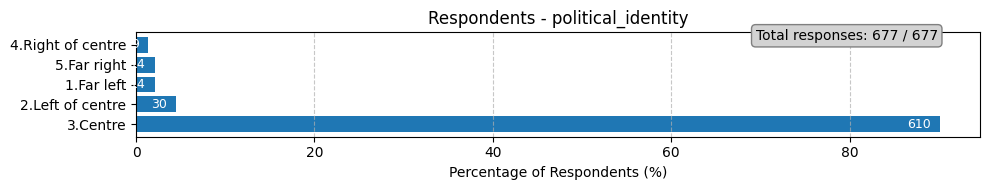

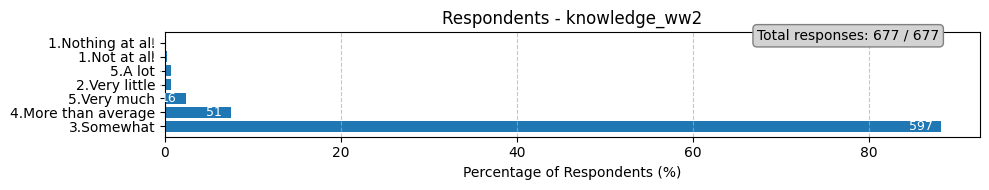

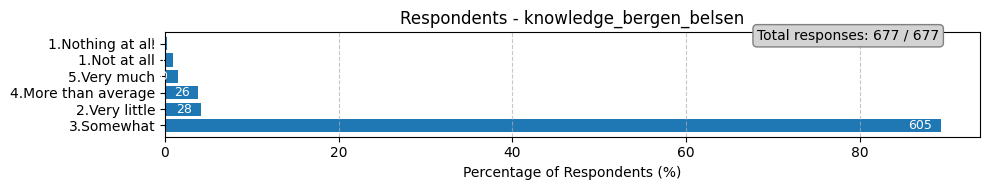

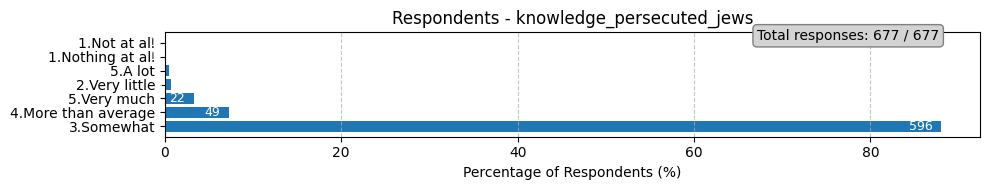

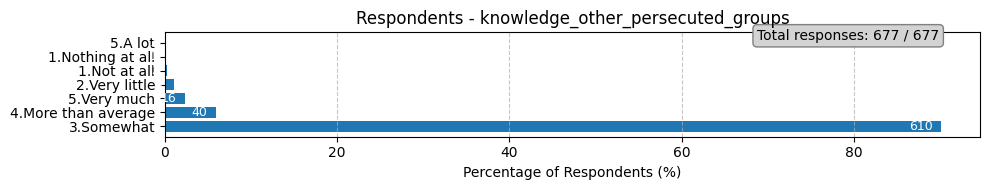

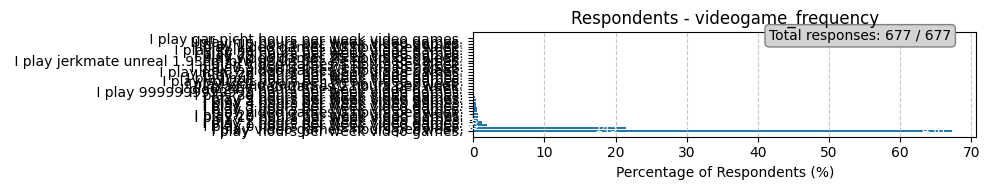

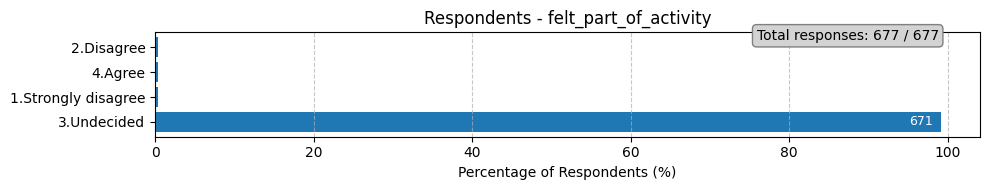

In [168]:
sliders = ['political_identity', 'knowledge_ww2', 'knowledge_bergen_belsen', 'knowledge_persecuted_jews', 'knowledge_other_persecuted_groups', 'videogame_frequency', 'felt_part_of_activity']
for slider in sliders:
    plot_categories(surveys, slider)

### Survey Analysis

In [18]:
surveys = data_fully_translated

In [19]:
surveys.to_csv("survey_standardized.csv")

In [35]:
# Define a function to map each entry to the given profiles based on criteria
def assign_user_profiles(row):
    age = row['age']
    visit_type = str(row['visit_type']).lower()
    visit_purpose = str(row['visit_purpose']).lower()
    education = str(row['education_level']).lower()
    personal_conn = str(row['personal_connection_nazi_history']).strip().lower()

    if ('student' in visit_type or 'school' in education): # or age in ['16-18', '19-24']):
        return 'School Student'
    elif (personal_conn == "yes"):
        return 'Personal Involvement'
    elif ('adult' in visit_type or 'cultural enrichment' in visit_purpose): # or ('30' <= str(age).split('-')[0] <= '70')):
        return 'Touristic Visitor'
    elif ('research' in visit_purpose or 'academic' in visit_purpose or education in ['university', 'masters', 'phd']):
        return 'Researcher'
    else:
        return 'Other/Unspecified'

# Apply this function to the dataset to create a new column with user profiles
surveys['Assigned Profile'] = surveys.apply(assign_user_profiles, axis=1)

# Count how many users have been assigned to each profile
profile_counts = surveys['Assigned Profile'].value_counts()
profile_counts

Assigned Profile
Other/Unspecified       580
School Student           59
Touristic Visitor        27
Personal Involvement     11
Name: count, dtype: int64

In [99]:
surveys.to_csv("survey_profiles.csv")

In [36]:
# Demographic features to plot
demographic_features = [
    'Nationality',
    'Gender Identity',
    'Age',
    'Highest Education Level',
    'Religious (optional)',
    'Political Identity (optional)'
]
# Generate standardized colors for each unique category across all features
unique_categories = pd.unique(surveys[demographic_features].values.ravel())
palette = sns.color_palette('tab20', len(unique_categories))
color_mapping = dict(zip(unique_categories, palette))

# Prepare data for plotting
assigned_profiles = surveys['Assigned Profile'].unique()

# Plotting with legends grouped by feature
fig, axes = plt.subplots(len(assigned_profiles), 1, figsize=(14, len(assigned_profiles)*5))

if len(assigned_profiles) == 1:
    axes = [axes]

for ax, profile in zip(axes, assigned_profiles):
    profile_data = surveys[surveys['Assigned Profile'] == profile]

    plot_data = {}
    for feature in demographic_features:
        plot_data[feature] = profile_data[feature].value_counts()

    plot_df = pd.DataFrame(plot_data).fillna(0)
    plot_df_norm = plot_df.div(plot_df.sum(axis=0), axis=1)

    colors = [color_mapping[cat] for cat in plot_df_norm.index]

    plot_df_norm.T.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Demographics for Assigned Profile: {profile}')
    ax.set_ylabel('Proportion')

    # Group legend by feature
    handles, labels = ax.get_legend_handles_labels()
    grouped_labels = []
    grouped_handles = []
    for feature in demographic_features:
        categories = plot_df_norm.index[plot_df_norm[feature] > 0].tolist()
        for category in categories:
            grouped_labels.append(f'{feature}: {category}')
            grouped_handles.append(handles[labels.index(category)])

    ax.legend(grouped_handles, grouped_labels, title='Feature: Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyError: "None of [Index(['Nationality', 'Gender Identity', 'Age', 'Highest Education Level',\n       'Religious (optional)', 'Political Identity (optional)'],\n      dtype='object', name='question')] are in the [columns]"

In [101]:
df_survey

,1.What is your nationality?,2.How do you identify? I identify as a...,3.How old are you?,4.What is your highest level of education?,5.How are you visiting?,6.What is the purpose of your visit?,7.Are you religious? (optional),8.How do you identify politically? (optional),9.Have you visited a memorial site of Nazi persecution before?,10.Do you have a personal connection to history related to Nazi persecution and/or Bergen-Belsen?,...,27.Gave me an impression of what life was like for those who were imprisoned,28.Gave me an impression of how the camp worked,29.Made me feel sympathetic towards the victims of Nazi persecution,30.Impacted my view on my own life,31.Impacted my view on today�s society,32.How did it impact your view on today�s society?: (optional),33.I feel like I want to share what I learnt with my family / friends / colleagues,"34.Because of the exploration, I plan to learn more about the history of Nazi persecution",35.Is there anything else you would like to share with us about the presentation and what you thought of it?: (optional),Email address:
1732843110739,Germany,NaN,NaN,NaN,NaN,NaN,NaN,3.Mitte,NaN,NaN,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,NaN,3.Unentschieden,3.Unentschieden,NaN,NaN
1732891230278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.Centre,NaN,Yes,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,NaN,3.Undecided,3.Undecided,NaN,NaN
1732916839015,NaN,Female,16-18,Primary/Secondary school,NaN,NaN,NaN,3.Centre,NaN,NaN,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,NaN,3.Undecided,3.Undecided,NaN,NaN
1733151232952,NaN,NaN,85+,NaN,NaN,NaN,No,3.Centre,NaN,NaN,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,NaN,3.Undecided,3.Undecided,NaN,NaN
1733156508535,polen,Weiblich,16-18,Weiterführende Schule,Als Schüler*in/Student*in mit meiner Gruppe,Um mehr über die Geschichte zu erfahren,Ja,3.Mitte,"Ja, schon einmal",NEIN,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,NaN,3.Unentschieden,3.Unentschieden,NaN,NaN
1733213466541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.Mitte,NaN,NaN,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,NaN,3.Unentschieden,3.Unentschieden,NaN,NaN
1733218842453,Admjn,NaN,NaN,NaN,NaN,NaN,NaN,3.Centre,NaN,NaN,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,NaN,3.Undecided,3.Undecided,Admin Aliisa,NaN
1733230279192,Flackenhorster,Andere_Mettwurst,85+,Promotion,NaN,NaN,Ich weiß nicht,1.Ganz links,"Ja, mehr als einmal zuvor",Ja,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,NaN,3.Unentschieden,3.Unentschieden,NaN,NaN
1733319328705,irish,Male,18-24,NaN,Alone,NaN,I don't know,3.Centre,NaN,NaN,...,3.Undecided,3.Undecided,3.Undecided,3.Undecided,3.Undecided,NaN,3.Undecided,3.Undecided,NaN,NaN
1733409761656,deutschland,Männlich,16-18,Weiterführende Schule,Als Schüler*in/Student*in mit meiner Gruppe,Andere,Ja,3.Mitte,NEIN,NEIN,...,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,3.Unentschieden,NaN,4.Zustimmen,2.Verschiedener Meinung sein,NaN,NaN


In [122]:
# Assuming your DataFrame is called df and the column is called 'filename'
df_metrics['filename'] = df_metrics['filename'].str.extract(r'(\d+)\.json').astype("int")


In [115]:
surveys_final = surveys.reset_index()

In [131]:
surv = surveys_final.merge(df_metrics, left_on="index", right_on="filename", how="left")

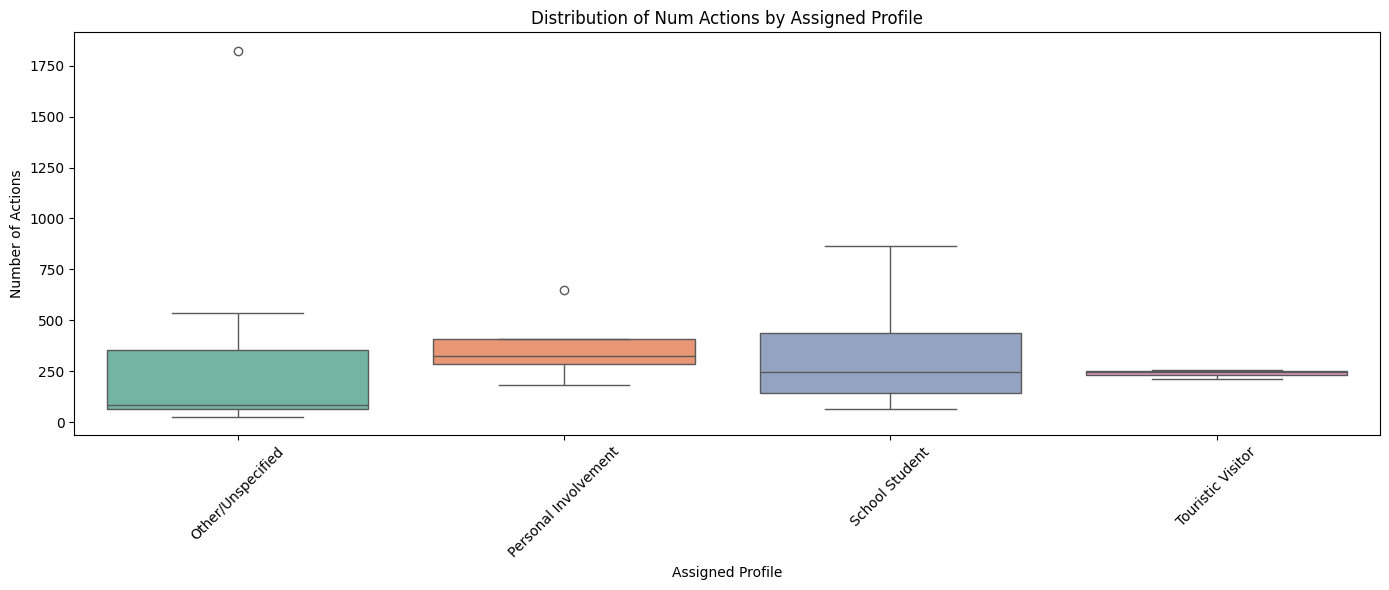

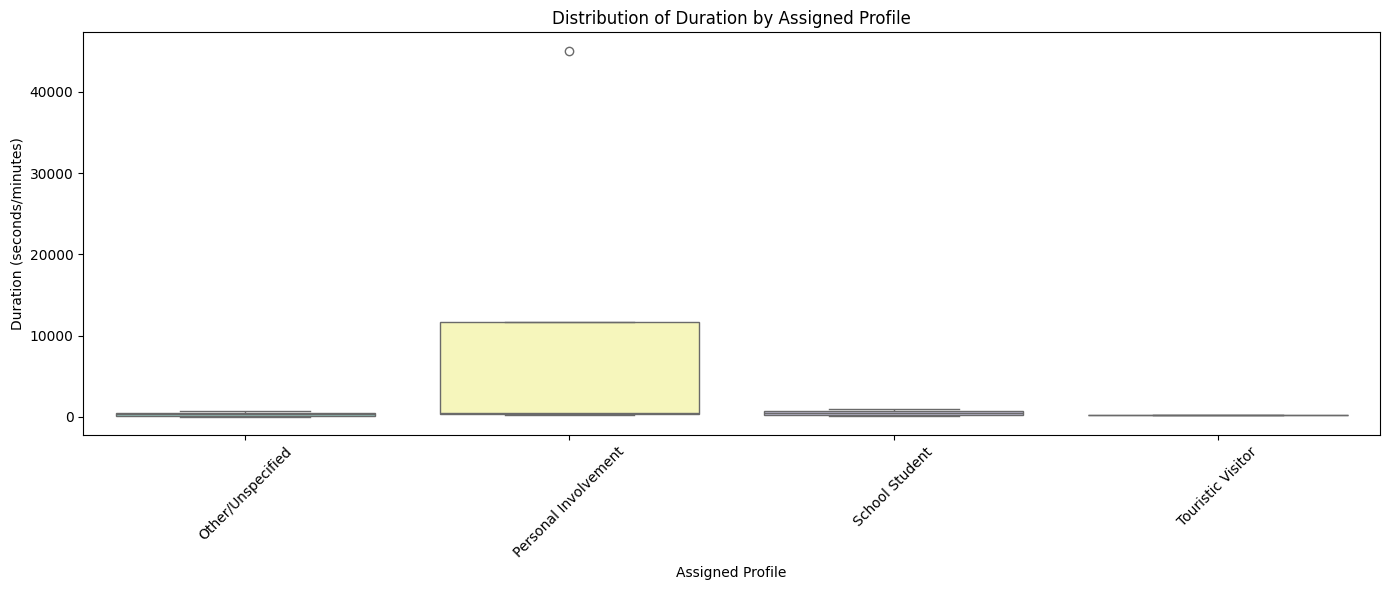

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and contains 'Assigned Profile', 'num_actions', 'duration'
assigned_profiles = surveys_final['Assigned Profile'].unique()

# Plot distribution of num_actions by profile
plt.figure(figsize=(14, 6))
sns.boxplot(data=surv, x='Assigned Profile', y='num_actions', palette='Set2')
plt.title('Distribution of Num Actions by Assigned Profile')
plt.ylabel('Number of Actions')
plt.xlabel('Assigned Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot distribution of duration by profile
plt.figure(figsize=(14, 6))
sns.boxplot(data=surv, x='Assigned Profile', y='duration', palette='Set3')
plt.title('Distribution of Duration by Assigned Profile')
plt.ylabel('Duration (seconds/minutes)')
plt.xlabel('Assigned Profile')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import scipy.stats as stats
import pandas as pd

# Function to check ANOVA assumptions
def check_anova_assumptions(df, metric, group_col='Assigned Profile'):
    print(f"\nChecking ANOVA assumptions for '{metric}'\n{'-'*50}")

    # Normality test (Shapiro-Wilk)
    print("Shapiro-Wilk normality test:")
    normality_results = []
    for group in df[group_col].unique():
        data_group = df[df[group_col] == group][metric].dropna()
        stat, p = stats.shapiro(data_group)
        print(f" - {group}: W={stat:.4f}, p={p:.4f}")
        normality_results.append((group, p))

    # Homogeneity of variance test (Levene’s test)
    groups = [group[metric].dropna() for name, group in df.groupby(group_col)]
    stat, p = stats.levene(*groups)
    print(f"\nLevene’s test for equal variances: W={stat:.4f}, p={p:.4f}")

# Example usage:
for metric in ['num_actions', 'duration']:
    check_anova_assumptions(surv, metric)


Checking ANOVA assumptions for 'num_actions'
--------------------------------------------------
Shapiro-Wilk normality test:
 - Other/Unspecified: W=0.5935, p=0.0000
 - Personal Involvement: W=0.8823, p=0.3485
 - School Student: W=0.8950, p=0.1604
 - Touristic Visitor: W=0.9168, p=0.4412

Levene’s test for equal variances: W=0.4801, p=0.6991

Checking ANOVA assumptions for 'duration'
--------------------------------------------------
Shapiro-Wilk normality test:
 - Other/Unspecified: W=0.8621, p=0.0612
 - Personal Involvement: W=0.6343, p=0.0015
 - School Student: W=0.9318, p=0.4299
 - Touristic Visitor: W=0.8836, p=0.3351

Levene’s test for equal variances: W=2.3592, p=0.0957


In [134]:
df_metrics

,filename,num_actions,is_complete,is_new,duration
0,1732835511436,25,False,False,60.60000
1,1732836715570,7,False,False,202.57000
2,1732837590169,222,False,False,536.02295
3,1732838671324,200,True,False,180.43600
4,1732838916442,133,False,False,193.45400
...,...,...,...,...,...
165,1738507190002,72,False,False,26.87000
166,1738508939484,49,True,True,87.07000
167,1738546402070,278,False,False,44281.14000
168,1738597633172,247,True,False,264.80000
